In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime

In [2]:
company= 'KOTAKBANK.NS'
endDate= '2023-01-26'

In [3]:
df= yf.download(company, period='max', end= endDate)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-07-02,2.402500,2.475000,2.4000,2.402500,2.225060,110800
2001-07-03,2.475000,2.475000,2.3750,2.400000,2.222745,77520
2001-07-04,2.425000,2.450000,2.3875,2.420000,2.241268,49360
2001-07-05,2.450000,2.472500,2.4000,2.415000,2.236637,62700
2001-07-06,2.425000,2.425000,2.3500,2.400000,2.222745,117800
...,...,...,...,...,...,...
2023-01-19,1803.500000,1803.500000,1765.0000,1767.300049,1767.300049,4425644
2023-01-20,1778.900024,1778.900024,1757.0000,1762.900024,1762.900024,4270294
2023-01-23,1790.000000,1799.650024,1770.0000,1783.750000,1783.750000,7764627


In [4]:
trainSet= df.iloc[:, 1:2].values

In [5]:
df.shape

(5372, 6)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler(feature_range=(0,1))

In [7]:
trainingSetScaled= scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [8]:
xTRAIN = []
yTRAIN = []

for i in range(60, len(trainingSetScaled)):
    xTRAIN.append(trainingSetScaled[i-60:i, 0])
    yTRAIN.append(trainingSetScaled[i, 0])
    
xTRAIN, yTRAIN= np.array(xTRAIN), np.array(yTRAIN)

In [9]:
xTRAIN= np.reshape(xTRAIN, newshape=(xTRAIN.shape[0], xTRAIN.shape[1], 1))

In [10]:
trainingSetScaled.shape

(5372, 1)

In [11]:
xTRAIN.shape

(5312, 60, 1)

In [12]:
yTRAIN.shape

(5312,)

In [13]:
import tensorflow as tf
from tensorflow import keras

In [61]:
regressor= keras.models.Sequential([
    keras.layers.LSTM(units=70, return_sequences= True, input_shape= (xTRAIN.shape[1], 1)),
    keras.layers.Dropout(rate= 0.2),
    keras.layers.LSTM(units=64, return_sequences= True), 
    keras.layers.Dropout(rate= 0.2),
    keras.layers.LSTM(units=55), 
    keras.layers.Dropout(rate= 0.2),
    keras.layers.Dense(units= 1)
])

In [62]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 70)            20160     
                                                                 
 dropout_6 (Dropout)         (None, 60, 70)            0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 64)            34560     
                                                                 
 dropout_7 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_8 (LSTM)               (None, 55)                26400     
                                                                 
 dropout_8 (Dropout)         (None, 55)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [63]:
regressor.compile(optimizer= 'adam', loss= keras.losses.mean_squared_error)

In [ ]:
regressor.fit(x= xTRAIN, y=yTRAIN, batch_size= 32, epochs= 100)

Epoch 1/100
166/166 [==============================] - 9s 40ms/step - loss: 0.0038
Epoch 2/100
166/166 [==============================] - 7s 41ms/step - loss: 0.0016
Epoch 3/100
166/166 [==============================] - 7s 39ms/step - loss: 0.0014
Epoch 4/100
166/166 [==============================] - 7s 40ms/step - loss: 0.0013
Epoch 5/100
166/166 [==============================] - 7s 41ms/step - loss: 0.0012
Epoch 6/100
166/166 [==============================] - 7s 40ms/step - loss: 0.0011
Epoch 7/100
166/166 [==============================] - 7s 40ms/step - loss: 0.0010
Epoch 8/100
166/166 [==============================] - 7s 40ms/step - loss: 9.9448e-04
Epoch 9/100
166/166 [==============================] - 7s 40ms/step - loss: 9.3126e-04
Epoch 10/100
166/166 [==============================] - 7s 40ms/step - loss: 0.0010
Epoch 11/100
166/166 [==============================] - 7s 40ms/step - loss: 9.0046e-04
Epoch 12/100
166/166 [==============================] - 7s 43ms/step - lo

In [45]:
prdctn= regressor.predict(xTRAIN)

166/166 [==============================] - 2s 9ms/step


regressor.save(f"../model/exports/{company}/")

In [46]:
testDF= yf.download(company, period='1d', start=endDate, end=datetime.datetime.now())
testDF.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-08,1936.900024,1936.900024,1879.550049,1886.500000,1886.500000,5491614
2023-06-09,1862.000000,1897.699951,1860.699951,1872.000000,1872.000000,14196924
2023-06-12,1874.849976,1884.000000,1864.449951,1879.449951,1879.449951,2815173
2023-06-13,1875.349976,1883.000000,1852.000000,1855.949951,1855.949951,9561827
2023-06-14,1855.949951,1867.949951,1846.400024,1864.650024,1864.650024,5577779


In [47]:
realSP= testDF['Close'].values

In [48]:
dfTotal= pd.concat((df['Close'], testDF['Close']), axis=0)

In [49]:
modelInp= dfTotal[len(dfTotal)-len(testDF)-60:].values

In [50]:
modelInp= modelInp.reshape(-1,1)

In [51]:
modelInp= scaler.transform(modelInp)

In [52]:
xTEST= []

for i in range(60, len(modelInp)):
    xTEST.append(modelInp[i-60:i, 0])

xTEST= np.array(xTEST)

In [53]:
xTEST.shape

(93, 60)

In [54]:
xTEST= np.reshape(xTEST, newshape= (xTEST.shape[0], xTEST.shape[1], 1))

In [55]:
#pred = pred[..., 0]

In [56]:
pred= regressor.predict(xTEST)

3/3 [==============================] - 1s 19ms/step


In [57]:
pred= scaler.inverse_transform(pred)

In [58]:
pred.shape

(93, 1)

In [59]:
import matplotlib.pyplot as plt

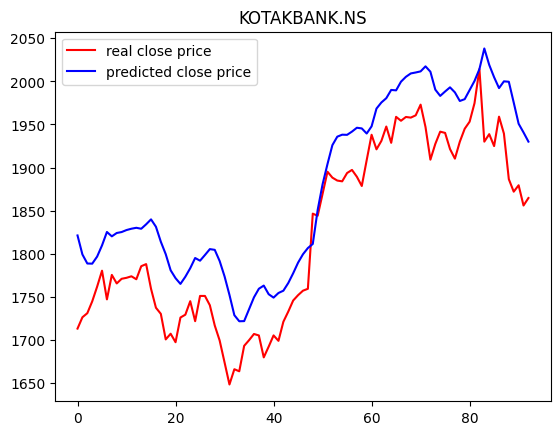

In [60]:
plt.plot(realSP, color= 'r', label= 'real close price')
plt.plot(pred, color= 'b', label= 'predicted close price')
plt.title(company)
plt.legend()
plt.show()

In [34]:
realData= [modelInp[len(modelInp)+1-60:len(modelInp+1), 0]]

In [35]:
realData= np.array(realData)

In [36]:
realData= np.reshape(realData, newshape=(realData.shape[0], realData.shape[1], 1))

In [37]:
prediction= regressor.predict(realData)

1/1 [==============================] - 1s 895ms/step


In [38]:
prediction= scaler.inverse_transform(prediction)

In [39]:
prediction

array([[1912.4996]], dtype=float32)

In [40]:
# Load your Keras model
#model = tf.keras.models.load_model('../model/exports/ITC.NS/')

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(regressor)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.experimental_lower_tensor_list_ops = False  # Disable lowering of tensor list ops
tflite_model = converter.convert()

# Save the converted TensorFlow Lite model
tflite_model_path = f"../../stocksense-api/stockSenseAPI/stockSenseAPI/exports/{company}.tflite"
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Rohan\AppData\Local\Temp\tmp50vpxckk\assets


INFO:tensorflow:Assets written to: C:\Users\Rohan\AppData\Local\Temp\tmp50vpxckk\assets
